Name : Sumit Gawande | Assignment Tatvacare

# Data Cleaning, Preparation and Exploratory Data Analysis (EDA)

#Data cleaning done on Excel.

Add one more binomial column based on diabetes as Presence of Diabetes and encode them as 0 and 1.
Date Formating.
Removed Irrelevant column -- Language spoken, Time and Index no.
Removed missing datapoints in Doctor city
Convert city and state name to proper case.
Add New column naamed Age Group to group the Ages in 5 categories.
Add Body Mass Index column, calculated from Height and Weight columns.

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r"C:\Users\ASUS\Desktop\Tatvacare Assign - Data Analyst.xlsx")

In [3]:
data.head(2)

,Patient Id,Indications,Presence of Diabetes,Onboarding Date,Age,Age Group,Gender,Height,Weight,Doctor Id,Doctor Gender,Doctor City,Doctor State
0,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,1,2023-08-31,50,36-50,F,165.0,77.0,609dd764-f93a-11ed-9614-86c4450e7523,M,GHAZIABAD,UTTAR PRADESH
1,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-26,45,36-50,M,172.0,75.0,69193aaa-eeea-11ed-9614-86c4450e7523,M,DELHI I,Delhi


In [4]:
data.shape    #no of datapoints and features

(5687, 13)

In [5]:
#Making city and state names to Proper case

data['Doctor City'] = data['Doctor City'].str.title()
data['Doctor State'] = data['Doctor State'].str.title()

In [6]:
data.head(2)

,Patient Id,Indications,Presence of Diabetes,Onboarding Date,Age,Age Group,Gender,Height,Weight,Doctor Id,Doctor Gender,Doctor City,Doctor State
0,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,1,2023-08-31,50,36-50,F,165.0,77.0,609dd764-f93a-11ed-9614-86c4450e7523,M,Ghaziabad,Uttar Pradesh
1,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-26,45,36-50,M,172.0,75.0,69193aaa-eeea-11ed-9614-86c4450e7523,M,Delhi I,Delhi


In [10]:
data.nunique()   #to check unique values in each variable

Patient Id              5687
Indications                4
Presence of Diabetes       2
Onboarding Date           61
Age                       74
Age Group                  5
Gender                     2
Height                    56
Weight                   100
Doctor Id                445
Doctor Gender              2
Doctor City              132
Doctor State              23
dtype: int64

In [11]:
data.isnull().sum()       #null values in each column

Patient Id                 0
Indications                0
Presence of Diabetes       0
Onboarding Date            0
Age                        0
Age Group                  0
Gender                     0
Height                  2896
Weight                  2896
Doctor Id                  0
Doctor Gender              0
Doctor City                0
Doctor State               0
dtype: int64

In [12]:
(data.isnull().sum()/(len(data)))*100         # percentage null values in each column

Patient Id               0.000000
Indications              0.000000
Presence of Diabetes     0.000000
Onboarding Date          0.000000
Age                      0.000000
Age Group                0.000000
Gender                   0.000000
Height                  50.923158
Weight                  50.923158
Doctor Id                0.000000
Doctor Gender            0.000000
Doctor City              0.000000
Doctor State             0.000000
dtype: float64

In [13]:
data.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient Id            5687 non-null   object        
 1   Indications           5687 non-null   object        
 2   Presence of Diabetes  5687 non-null   int64         
 3   Onboarding Date       5687 non-null   datetime64[ns]
 4   Age                   5687 non-null   int64         
 5   Age Group             5687 non-null   object        
 6   Gender                5687 non-null   object        
 7   Height                2791 non-null   float64       
 8   Weight                2791 non-null   float64       
 9   Doctor Id             5687 non-null   object        
 10  Doctor Gender         5687 non-null   object        
 11  Doctor City           5687 non-null   object        
 12  Doctor State          5687 non-null   object        
dtypes: datetime64[ns](

In [14]:
data.describe().round(2)    #Basic statistics abt the data

,Presence of Diabetes,Age,Height,Weight
count,5687.00,5687.00,2791.00,2791.00
mean,0.46,45.00,164.33,72.93
std,0.50,13.69,9.05,13.34
min,0.00,18.00,121.00,30.00
25%,0.00,35.00,160.00,63.00
50%,0.00,43.00,165.00,73.00
75%,1.00,54.00,170.00,85.00
max,1.00,92.00,198.00,120.00


In [15]:
#Imputing null values in height column by group means.

grouped_means = data.groupby('Gender')['Height'].transform('mean')
data['Height'].fillna(grouped_means, inplace=True)

In [16]:
#Imputing null values in Weight column by group means.

grouped_means = data.groupby('Gender')['Weight'].transform('mean')
data['Weight'].fillna(grouped_means, inplace=True)

In [17]:
data.head(5).round(2)

,Patient Id,Indications,Presence of Diabetes,Onboarding Date,Age,Age Group,Gender,Height,Weight,Doctor Id,Doctor Gender,Doctor City,Doctor State
0,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,1,2023-08-31,50,36-50,F,165.00,77.00,609dd764-f93a-11ed-9614-86c4450e7523,M,Ghaziabad,Uttar Pradesh
1,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-26,45,36-50,M,172.00,75.00,69193aaa-eeea-11ed-9614-86c4450e7523,M,Delhi I,Delhi
2,003111e5-5ba2-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-25,39,36-50,F,158.63,68.34,0bb89ed6-eeee-11ed-9614-86c4450e7523,M,Ludhiana,Punjab
3,0050c2ea-41b5-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-08-23,67,66 above,M,166.50,74.67,7e421c0e-eef3-11ed-9614-86c4450e7523,M,Siliguri,West Bengal
4,005e06c0-3753-11ee-a67f-f4ce2d75c16b,Fatty Liver - NAFL,1,2023-08-10,60,51-65,M,166.50,74.67,b12294f7-f939-11ed-9614-86c4450e7523,M,Wadala,Maharashtra


In [18]:
#Adding a BMI variable from Height and Weight variable.

data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

In [19]:
data.head(3).round(2)

,Patient Id,Indications,Presence of Diabetes,Onboarding Date,Age,Age Group,Gender,Height,Weight,Doctor Id,Doctor Gender,Doctor City,Doctor State,BMI
0,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,1,2023-08-31,50,36-50,F,165.00,77.00,609dd764-f93a-11ed-9614-86c4450e7523,M,Ghaziabad,Uttar Pradesh,28.28
1,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-26,45,36-50,M,172.00,75.00,69193aaa-eeea-11ed-9614-86c4450e7523,M,Delhi I,Delhi,25.35
2,003111e5-5ba2-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-25,39,36-50,F,158.63,68.34,0bb89ed6-eeee-11ed-9614-86c4450e7523,M,Ludhiana,Punjab,27.16


In [20]:
data.describe().round(2)

,Presence of Diabetes,Age,Height,Weight,BMI
count,5687.00,5687.00,5687.00,5687.00,5687.00
mean,0.46,45.00,164.19,72.81,27.05
std,0.50,13.69,6.85,9.58,3.59
min,0.00,18.00,121.00,30.00,10.53
25%,0.00,35.00,158.63,68.34,26.94
50%,0.00,43.00,166.50,74.67,26.94
75%,1.00,54.00,166.50,74.67,27.16
max,1.00,92.00,198.00,120.00,63.74


In [21]:
data.isnull().sum()

Patient Id              0
Indications             0
Presence of Diabetes    0
Onboarding Date         0
Age                     0
Age Group               0
Gender                  0
Height                  0
Weight                  0
Doctor Id               0
Doctor Gender           0
Doctor City             0
Doctor State            0
BMI                     0
dtype: int64

In [53]:
data.corr()

,Presence of Diabetes,Age,Height,Weight,BMI,Cluster
Presence of Diabetes,1.000000,0.190615,0.012340,0.108305,0.097063,-0.173547
Age,0.190615,1.000000,-0.083248,-0.034503,0.018256,-0.433170
Height,0.012340,-0.083248,1.000000,0.342838,-0.301977,0.158191
Weight,0.108305,-0.034503,0.342838,1.000000,0.780445,-0.463173
BMI,0.097063,0.018256,-0.301977,0.780445,1.000000,-0.573382
Cluster,-0.173547,-0.433170,0.158191,-0.463173,-0.573382,1.000000


In [22]:
import seaborn as sns

In [ ]:
# UNIVARIATE PLOTS

<AxesSubplot:xlabel='Height', ylabel='Count'>

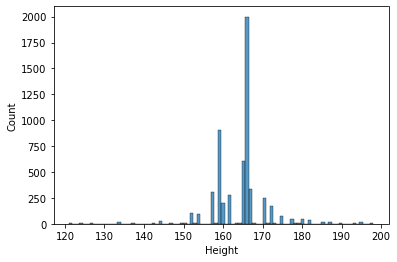

In [54]:
sns.histplot(data['Height'], palette="pastel")

<AxesSubplot:xlabel='Height'>

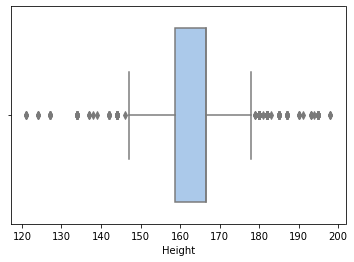

In [55]:
sns.boxplot(data=data, x='Height', palette="pastel")

<AxesSubplot:xlabel='Height', ylabel='Count'>

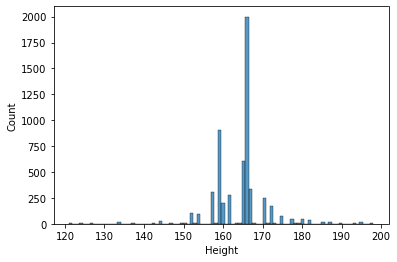

In [52]:
sns.histplot(data= data, x= 'Height', palette="pastel")

<AxesSubplot:xlabel='Weight'>

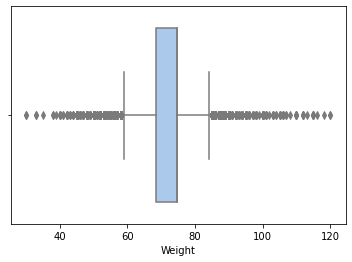

In [51]:
sns.boxplot(data=data, x='Weight',palette="pastel")

<AxesSubplot:xlabel='Gender', ylabel='count'>

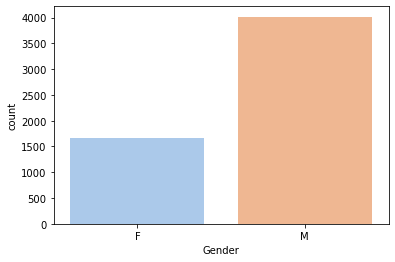

In [45]:
sns.countplot(x="Gender", data=data, palette="pastel")

<AxesSubplot:xlabel='Indications', ylabel='count'>

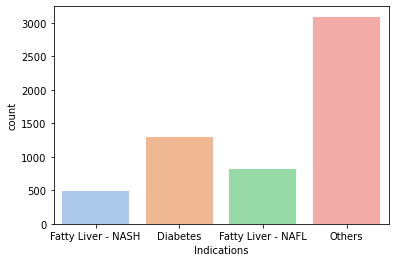

In [46]:
sns.countplot(x="Indications", data=data, palette="pastel")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Delhi'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'West Bengal'),
  Text(4, 0, 'Maharashtra'),
  Text(5, 0, 'Jharkhand'),
  Text(6, 0, 'Chandigarh'),
  Text(7, 0, 'Andhra Pradesh'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Rajasthan'),
  Text(10, 0, 'Uttarakhand'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Assam'),
  Text(13, 0, 'Chhattisgarh'),
  Text(14, 0, 'Madhya Pradesh'),
  Text(15, 0, 'Haryana'),
  Text(16, 0, 'Tamil Nadu'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Jammu And Kashmir'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Chandigarh (Ut)'),
  Text(21, 0, 'Gujarat'),
  Text(22, 0, 'Orissa')])

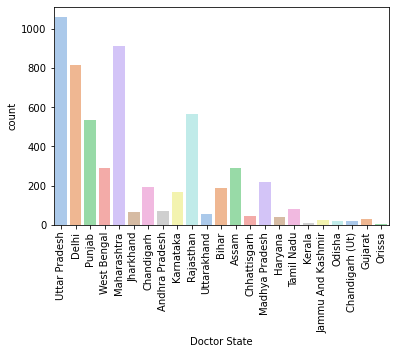

In [98]:
sns.countplot(x="Doctor State", data=data,palette="pastel")
plt.xticks(rotation=90) 

In [ ]:
# BIVARIATE PLOTS

Text(0.5, 1.0, 'Distribution of Age across Different Indications')

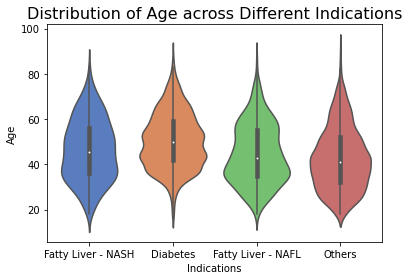

In [50]:
sns.violinplot(x="Indications", y="Age", data=data, palette="muted")           #bivariate
plt.title("Distribution of Age across Different Indications", fontsize=16)

<AxesSubplot:xlabel='Indications', ylabel='Age'>

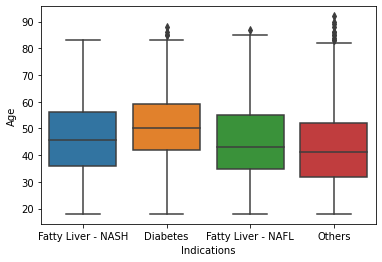

In [57]:
sns.boxplot(x='Indications', y='Age', data=data)

<AxesSubplot:xlabel='Indications', ylabel='Height'>

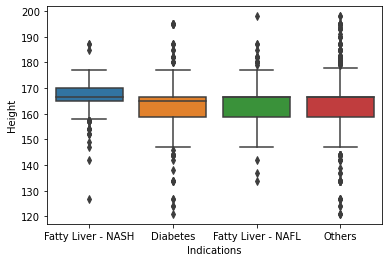

In [58]:
sns.boxplot(x='Indications', y='Height', data=data)

<AxesSubplot:xlabel='Indications', ylabel='Weight'>

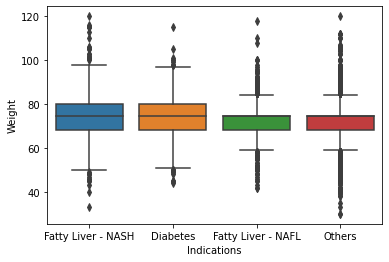

In [61]:
sns.boxplot(x='Indications', y='Weight', data=data)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

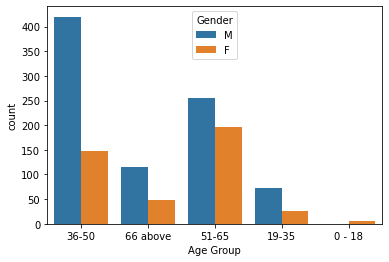

In [64]:
sns.countplot(x='Age Group', hue='Gender', data=data[data['Indications'] == 'Diabetes'])    # We Can plot same for all indicaitons.

In [ ]:
# MULTIVARIATE PLOTS

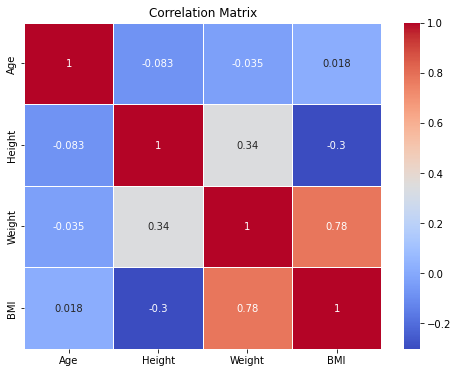

In [70]:
numerical_columns = ['Age', 'Height', 'Weight','BMI']

correlation_matrix = data[numerical_columns].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

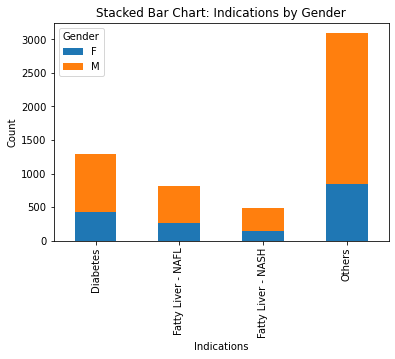

In [67]:
# MAke a contingency table for two categorical variable Indications and Gender
contingency_table = pd.crosstab(data['Indications'], data['Gender'])

# stacked bar chart
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Indications')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Indications by Gender')
plt.show()

In [ ]:
# Timewise analysis of diabetes patient

<AxesSubplot:xlabel='Onboarding Date', ylabel='Number of Diabetes Cases'>

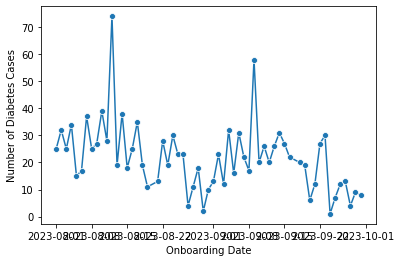

In [78]:
# Convert 'Onboarding Date' column to datetime
data['Onboarding Date'] = pd.to_datetime(data['Onboarding Date'], format='%d/%m/%Y')

# Diabetes cases
diabetes_data = data[data['Indications'] == 'Diabetes']

# Group data by Onboarding Date
diabetes_trends = diabetes_data.groupby('Onboarding Date').size().reset_index(name='Number of Diabetes Cases')

# line chart
sns.lineplot(x='Onboarding Date', y='Number of Diabetes Cases', data=diabetes_trends, marker='o')

In [ ]:
# PAtient Indiacatons wise and Age wise

<AxesSubplot:xlabel='Indications', ylabel='Number of Patients'>

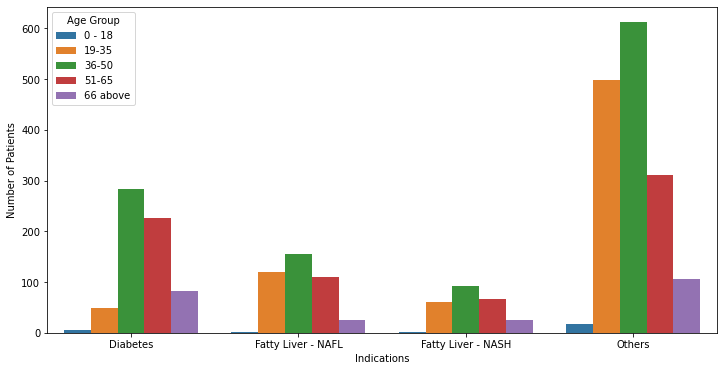

In [92]:
patient_profiles = data.groupby(['Indications', 'Gender', 'Age Group']).size().reset_index(name='Number of Patients')

plt.figure(figsize=(12, 6))
sns.barplot(x='Indications', y='Number of Patients', hue='Age Group', data=patient_profiles, ci=None)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Chandigarh (Ut)'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Jammu And Kashmir'),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Maharashtra'),
  Text(15, 0, 'Odisha'),
  Text(16, 0, 'Orissa'),
  Text(17, 0, 'Punjab'),
  Text(18, 0, 'Rajasthan'),
  Text(19, 0, 'Tamil Nadu'),
  Text(20, 0, 'Uttar Pradesh'),
  Text(21, 0, 'Uttarakhand'),
  Text(22, 0, 'West Bengal')])

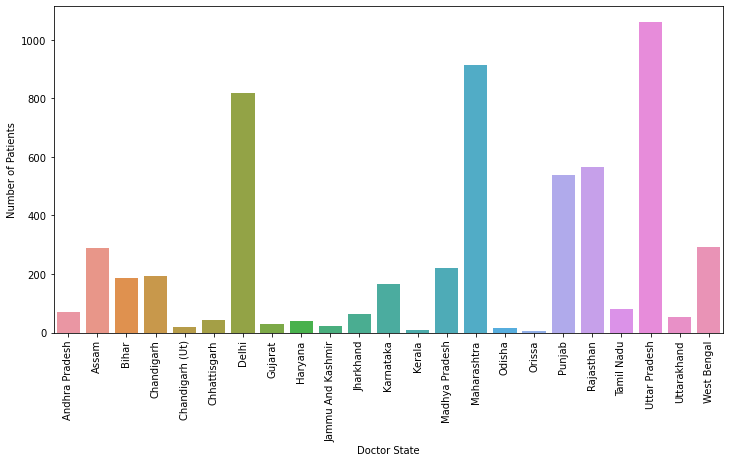

In [97]:
# Doctor's statewise patients
doctor_distribution = data.groupby('Doctor State').size().reset_index(name='Number of Patients')

plt.figure(figsize=(12, 6))
sns.barplot(x='Doctor State', y='Number of Patients', data=doctor_distribution, ci=None)
plt.xticks(rotation=90) 

# Patient Segmentation:

# CLUSTERING

In [31]:
data.head(3)

,Patient Id,Indications,Presence of Diabetes,Onboarding Date,Age,Age Group,Gender,Height,Weight,Doctor Id,Doctor Gender,Doctor City,Doctor State,BMI
0,001a1e8d-47c7-11ee-bf18-7b40cd44ecd5,Fatty Liver - NASH,1,2023-08-31,50,36-50,F,165.000000,77.000000,609dd764-f93a-11ed-9614-86c4450e7523,M,Ghaziabad,Uttar Pradesh,28.282828
1,002b561d-5c7b-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-26,45,36-50,M,172.000000,75.000000,69193aaa-eeea-11ed-9614-86c4450e7523,M,Delhi I,Delhi,25.351541
2,003111e5-5ba2-11ee-bf18-7b40cd44ecd5,Diabetes,1,2023-09-25,39,36-50,F,158.627273,68.338182,0bb89ed6-eeee-11ed-9614-86c4450e7523,M,Ludhiana,Punjab,27.158620


In [32]:
from sklearn.preprocessing import StandardScaler

# feature selection for clustering
features = data[['BMI','Age']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

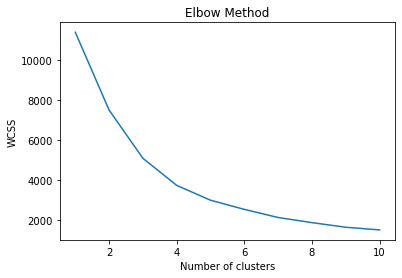

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []     #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# So Based on Elbow Method 
k = 3
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Print the count of patients in each cluster
print(data['Cluster'].value_counts())

2    2498
1    2249
0     940
Name: Cluster, dtype: int64


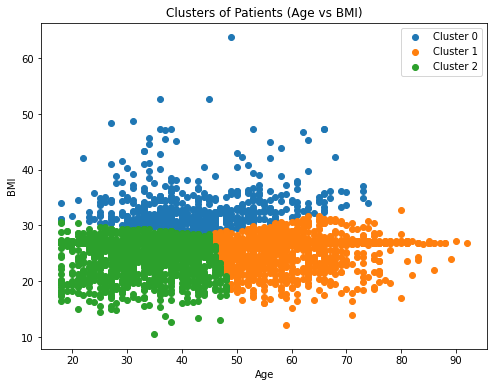

In [36]:
# Visualize clusters using scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['BMI'], label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Clusters of Patients (Age vs BMI)')
plt.legend()
plt.show()

#Interpretation: 
Based on the Cluster Image,  We can classify the patients in the cluster having less BMI are more likely to have healthy weight and height than the ptients in the other clusters. So they will have better lifestyle.

# Recommendations: 

In [ ]:
glucose level,blood pressure, insulin , thickness

In [ ]:
I think, While collecting data few more parameters should be considered for more accurate analysis.
General parameters like Glucose level, Thickness of the body, Blood Pressure , Insulin level should be focused in this case.
If we have data of more parameters, we can train a machine learning model to know whether the patient has a perticular disease way before the testing.
Also, we can can collect the data related to the diet of the patient so as to develop a model which can show a particular diet plan.

# Thank You